## 1. Setup & Chargement des données

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Style des graphiques
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Chemins
gold_path = "../../../../data/gold"
silver_path = "../../../../data/silver"

print("✓ Libraries loaded")

✓ Libraries loaded


In [2]:
# Charger les données Gold (Parquet → Pandas)
df_flow = pd.read_parquet(f"{gold_path}/gold_flow_amenagement_daily")
df_link = pd.read_parquet(f"{gold_path}/gold_link_amenagement_channel")

# Charger les aménagements Silver pour enrichir (metadata)
df_amenagements = pd.read_parquet(f"{silver_path}/silver_amenagements_with_centroids")

print(f"✓ gold_flow_amenagement_daily: {len(df_flow):,} rows")
print(f"✓ gold_link_amenagement_channel: {len(df_link):,} rows")
print(f"✓ silver_amenagements: {len(df_amenagements):,} rows")

# Aperçu
df_flow.head()

✓ gold_flow_amenagement_daily: 385,427 rows
✓ gold_link_amenagement_channel: 4,665 rows
✓ silver_amenagements: 4,592 rows


,amenagement_id,date,flux_estime,n_channels
0,129,2014-01-01,161,1
1,129,2014-01-02,185,1
2,129,2014-01-03,94,1
3,129,2014-01-04,125,1
4,129,2014-01-05,281,1


In [3]:
# Statistiques descriptives
print("=== Statistiques gold_flow_amenagement_daily ===")
print(df_flow.describe())

print("\n=== Types de données ===")
print(df_flow.dtypes)

print("\n=== Valeurs manquantes ===")
print(df_flow.isnull().sum())

=== Statistiques gold_flow_amenagement_daily ===
         flux_estime  n_channels
count  385427.000000    385427.0
mean     1441.771461         1.0
std      1697.702102         0.0
min         0.000000         1.0
25%       384.000000         1.0
50%       865.000000         1.0
75%      1890.000000         1.0
max     26045.000000         1.0

=== Types de données ===
amenagement_id    object
date              object
flux_estime        int64
n_channels         int64
dtype: object

=== Valeurs manquantes ===
amenagement_id    0
date              0
flux_estime       0
n_channels        0
dtype: int64


## 2. Vue d'ensemble des aménagements avec données

In [4]:
# Agrégation par aménagement
summary = df_flow.groupby('amenagement_id').agg(
    total_days=('date', 'count'),
    total_flux=('flux_estime', 'sum'),
    avg_daily_flux=('flux_estime', 'mean'),
    min_flux=('flux_estime', 'min'),
    max_flux=('flux_estime', 'max'),
    std_flux=('flux_estime', 'std'),
    first_date=('date', 'min'),
    last_date=('date', 'max')
).reset_index()

# Convertir en datetime si nécessaire, puis calculer la plage de dates
summary['first_date'] = pd.to_datetime(summary['first_date'])
summary['last_date'] = pd.to_datetime(summary['last_date'])
summary['date_range_days'] = (summary['last_date'] - summary['first_date']).dt.days
summary['coverage_pct'] = (summary['total_days'] / summary['date_range_days'] * 100).round(1)

print(f"✓ {len(summary)} aménagements avec données de flux")
summary.sort_values('avg_daily_flux', ascending=False).head(20)

✓ 153 aménagements avec données de flux


,amenagement_id,total_days,total_flux,avg_daily_flux,min_flux,max_flux,std_flux,first_date,last_date,date_range_days,coverage_pct
91,4112,4266,28745766,6738.341772,17,19387,4236.575052,2014-01-01,2025-12-01,4352,98.0
96,4265,3567,22088867,6192.561536,243,18472,4009.939955,2014-01-01,2023-10-23,3582,99.6
55,2845,4120,22937475,5567.348301,111,16851,3237.176896,2014-01-01,2025-12-01,4352,94.7
98,4513,806,3739698,4639.823821,198,10051,1884.927698,2023-08-07,2025-12-01,847,95.2
89,4093,3275,14053186,4291.049160,227,16913,2073.162476,2014-10-20,2023-10-23,3290,99.5
65,2941,3905,15820933,4051.455314,0,15003,1846.054665,2014-10-20,2025-12-01,4060,96.2
75,3527,2291,9255362,4039.878656,37,8462,1645.714840,2019-07-29,2025-12-01,2317,98.9
76,3539,3567,13833507,3878.190917,0,9930,1451.833540,2014-01-01,2023-10-23,3582,99.6
97,4295,619,2370289,3829.222940,1043,7173,1152.073884,2024-02-20,2025-12-01,650,95.2
13,1909,3556,13077269,3677.522216,0,8792,1568.090279,2014-01-01,2023-10-23,3582,99.3


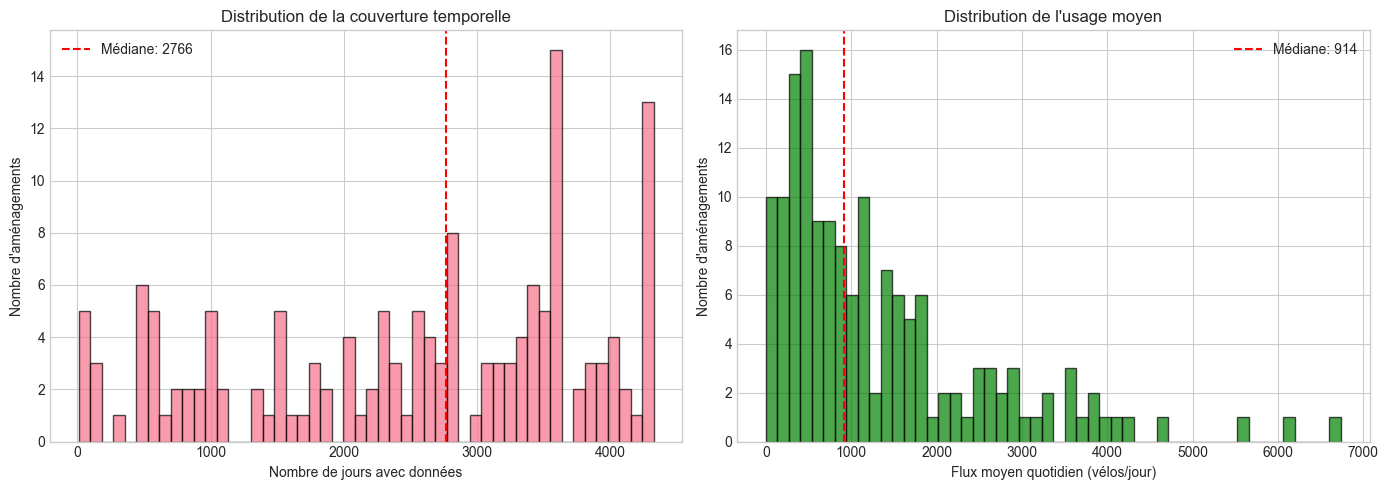

In [5]:
# Distribution du nombre de jours de données par aménagement
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogramme du nombre de jours
axes[0].hist(summary['total_days'], bins=50, edgecolor='black', alpha=0.7)
axes[0].axvline(summary['total_days'].median(), color='red', linestyle='--', label=f"Médiane: {summary['total_days'].median():.0f}")
axes[0].set_xlabel('Nombre de jours avec données')
axes[0].set_ylabel('Nombre d\'aménagements')
axes[0].set_title('Distribution de la couverture temporelle')
axes[0].legend()

# Distribution du flux moyen quotidien
axes[1].hist(summary['avg_daily_flux'], bins=50, edgecolor='black', alpha=0.7, color='green')
axes[1].axvline(summary['avg_daily_flux'].median(), color='red', linestyle='--', label=f"Médiane: {summary['avg_daily_flux'].median():.0f}")
axes[1].set_xlabel('Flux moyen quotidien (vélos/jour)')
axes[1].set_ylabel('Nombre d\'aménagements')
axes[1].set_title('Distribution de l\'usage moyen')
axes[1].legend()

plt.tight_layout()
plt.show()

## 3. Top 20 des aménagements les plus utilisés

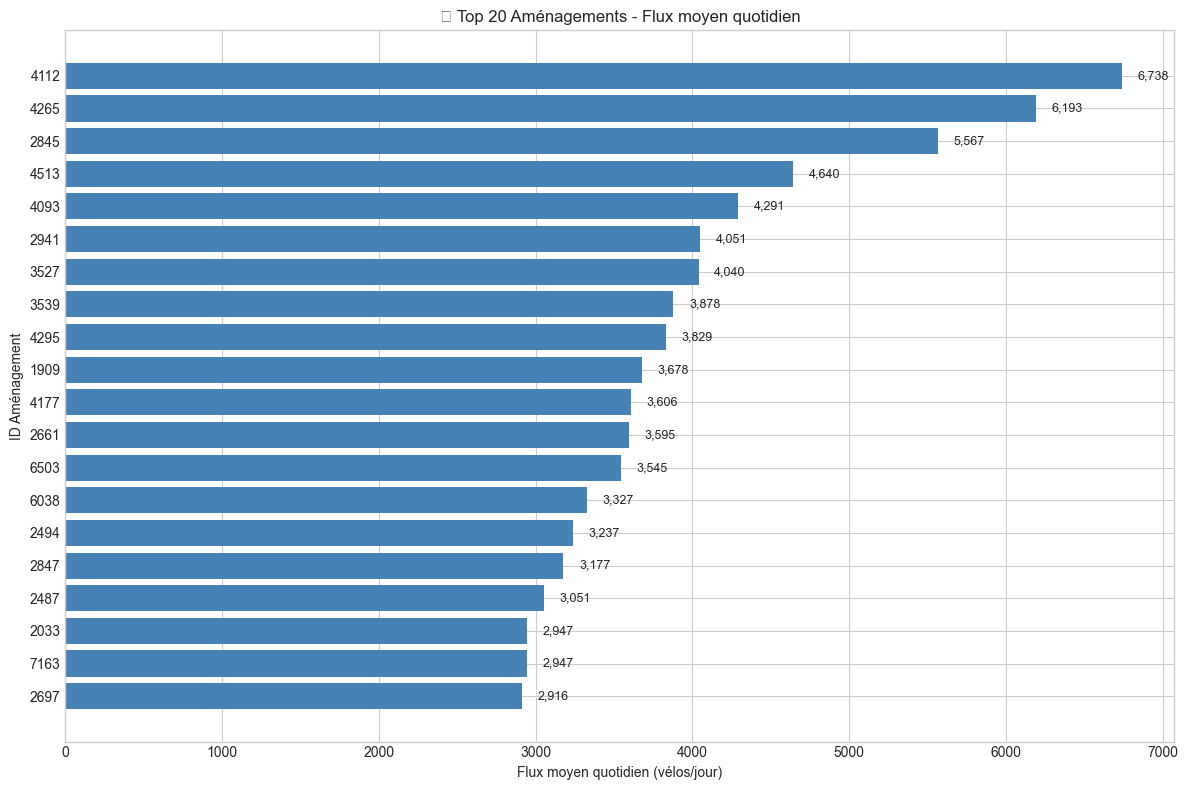

In [6]:
# Top 20 par flux moyen
top20 = summary.nlargest(20, 'avg_daily_flux')

fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.barh(top20['amenagement_id'].astype(str), top20['avg_daily_flux'], color='steelblue')
ax.set_xlabel('Flux moyen quotidien (vélos/jour)')
ax.set_ylabel('ID Aménagement')
ax.set_title('🚴 Top 20 Aménagements - Flux moyen quotidien')
ax.invert_yaxis()

# Ajouter les valeurs
for bar, val in zip(bars, top20['avg_daily_flux']):
    ax.text(val + 100, bar.get_y() + bar.get_height()/2, f'{val:,.0f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

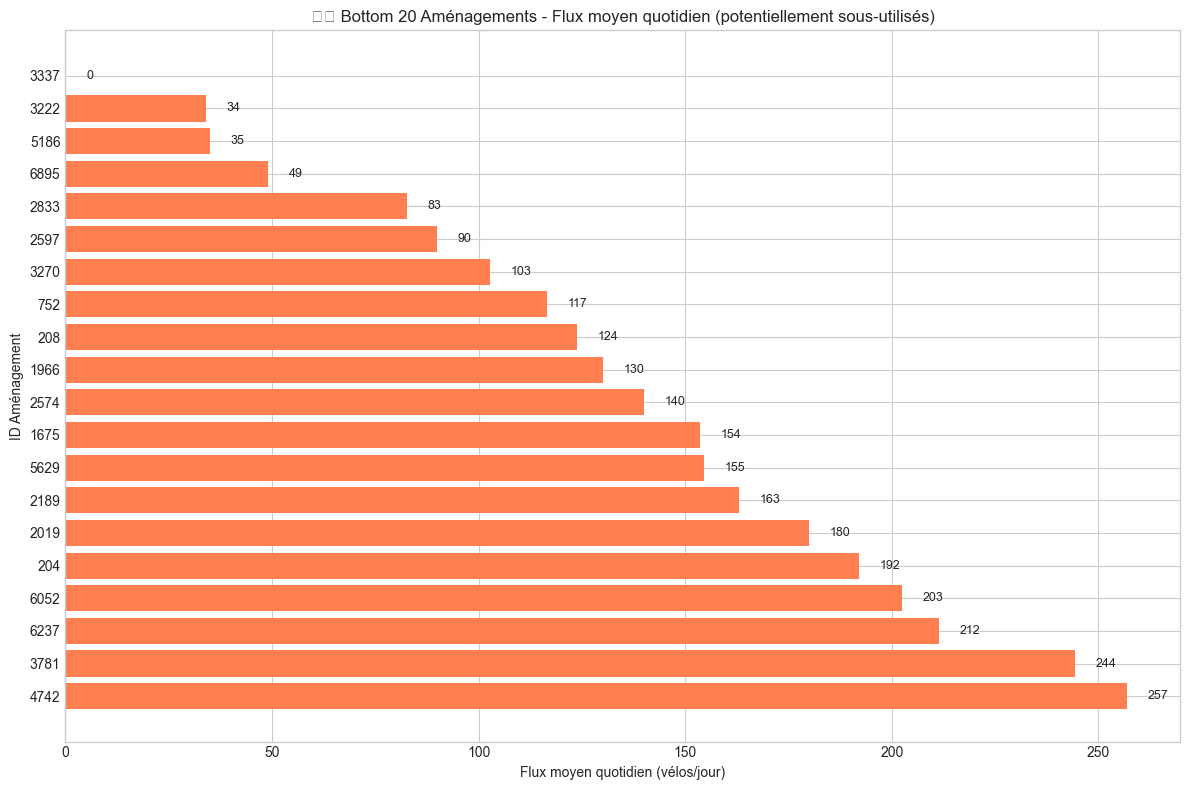

In [7]:
# Bottom 20 - Aménagements les moins utilisés (potentiellement sous-utilisés)
bottom20 = summary.nsmallest(20, 'avg_daily_flux')

fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.barh(bottom20['amenagement_id'].astype(str), bottom20['avg_daily_flux'], color='coral')
ax.set_xlabel('Flux moyen quotidien (vélos/jour)')
ax.set_ylabel('ID Aménagement')
ax.set_title('⚠️ Bottom 20 Aménagements - Flux moyen quotidien (potentiellement sous-utilisés)')
ax.invert_yaxis()

# Ajouter les valeurs
for bar, val in zip(bars, bottom20['avg_daily_flux']):
    ax.text(val + 5, bar.get_y() + bar.get_height()/2, f'{val:,.0f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

## 4. Analyse temporelle

In [8]:
# Préparer les données temporelles
df_flow['date'] = pd.to_datetime(df_flow['date'])
df_flow['year'] = df_flow['date'].dt.year
df_flow['month'] = df_flow['date'].dt.month
df_flow['day_of_week'] = df_flow['date'].dt.dayofweek
df_flow['week_of_year'] = df_flow['date'].dt.isocalendar().week

print(f"Période couverte: {df_flow['date'].min()} → {df_flow['date'].max()}")
print(f"Années: {sorted(df_flow['year'].unique())}")

Période couverte: 2014-01-01 00:00:00 → 2025-12-01 00:00:00
Années: [np.int32(2014), np.int32(2015), np.int32(2016), np.int32(2017), np.int32(2018), np.int32(2019), np.int32(2020), np.int32(2021), np.int32(2022), np.int32(2023), np.int32(2024), np.int32(2025)]


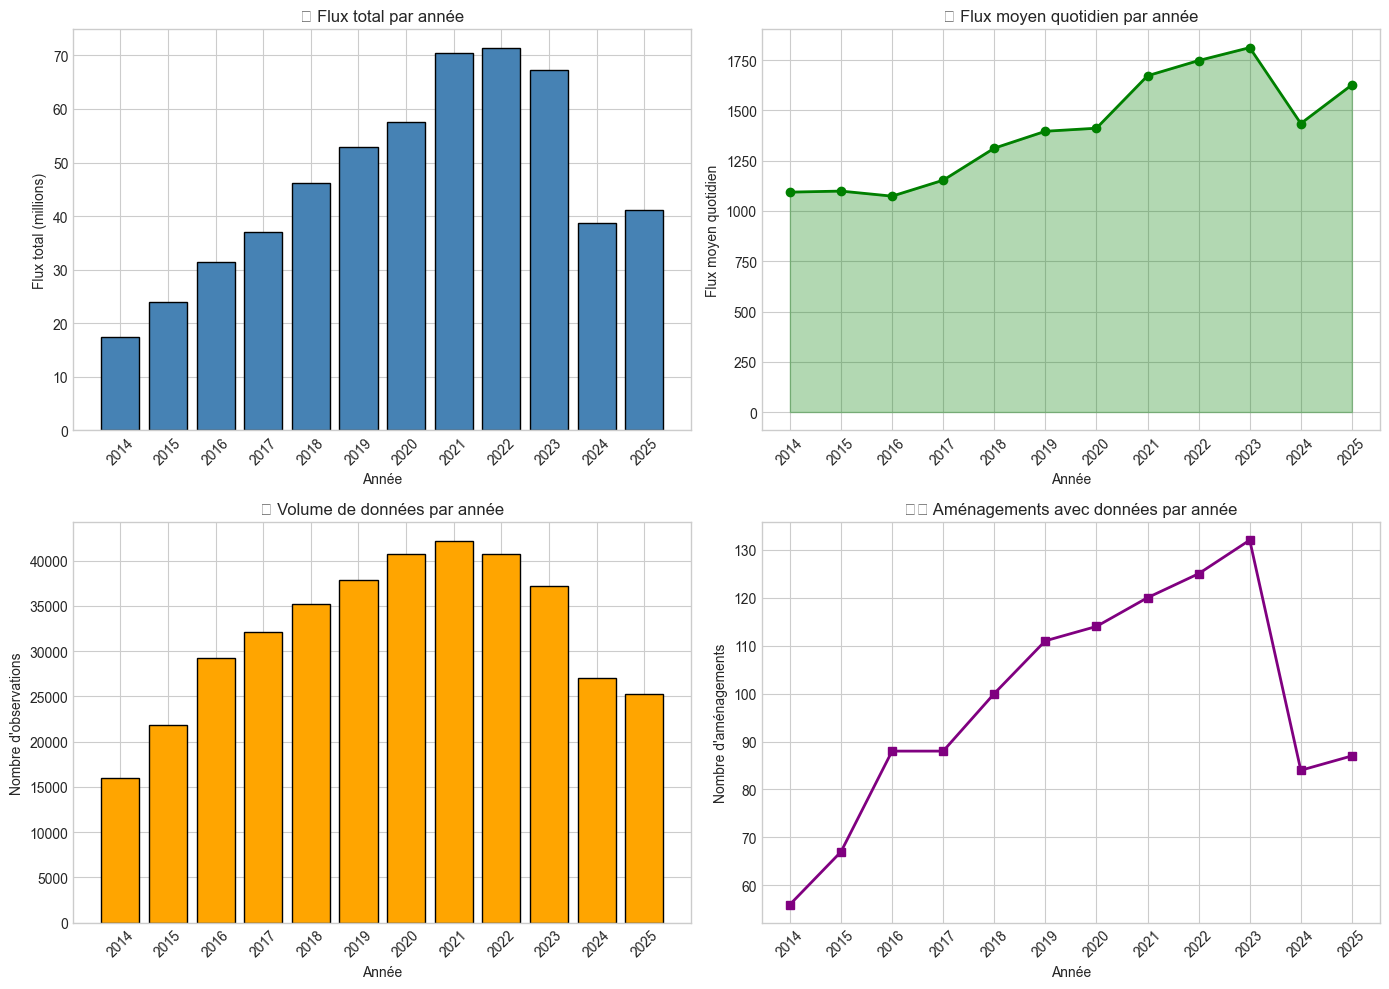

In [9]:
# Évolution annuelle du flux total
yearly = df_flow.groupby('year').agg(
    total_flux=('flux_estime', 'sum'),
    avg_flux=('flux_estime', 'mean'),
    n_observations=('flux_estime', 'count'),
    n_amenagements=('amenagement_id', 'nunique')
).reset_index()

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Flux total par année
axes[0, 0].bar(yearly['year'], yearly['total_flux'] / 1e6, color='steelblue', edgecolor='black')
axes[0, 0].set_xlabel('Année')
axes[0, 0].set_ylabel('Flux total (millions)')
axes[0, 0].set_title('📈 Flux total par année')
axes[0, 0].set_xticks(yearly['year'])
axes[0, 0].tick_params(axis='x', rotation=45)

# Flux moyen par année
axes[0, 1].plot(yearly['year'], yearly['avg_flux'], marker='o', linewidth=2, color='green')
axes[0, 1].fill_between(yearly['year'], yearly['avg_flux'], alpha=0.3, color='green')
axes[0, 1].set_xlabel('Année')
axes[0, 1].set_ylabel('Flux moyen quotidien')
axes[0, 1].set_title('📊 Flux moyen quotidien par année')
axes[0, 1].set_xticks(yearly['year'])
axes[0, 1].tick_params(axis='x', rotation=45)

# Nombre d'observations
axes[1, 0].bar(yearly['year'], yearly['n_observations'], color='orange', edgecolor='black')
axes[1, 0].set_xlabel('Année')
axes[1, 0].set_ylabel('Nombre d\'observations')
axes[1, 0].set_title('📅 Volume de données par année')
axes[1, 0].set_xticks(yearly['year'])
axes[1, 0].tick_params(axis='x', rotation=45)

# Nombre d'aménagements avec données
axes[1, 1].plot(yearly['year'], yearly['n_amenagements'], marker='s', linewidth=2, color='purple')
axes[1, 1].set_xlabel('Année')
axes[1, 1].set_ylabel('Nombre d\'aménagements')
axes[1, 1].set_title('🏗️ Aménagements avec données par année')
axes[1, 1].set_xticks(yearly['year'])
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

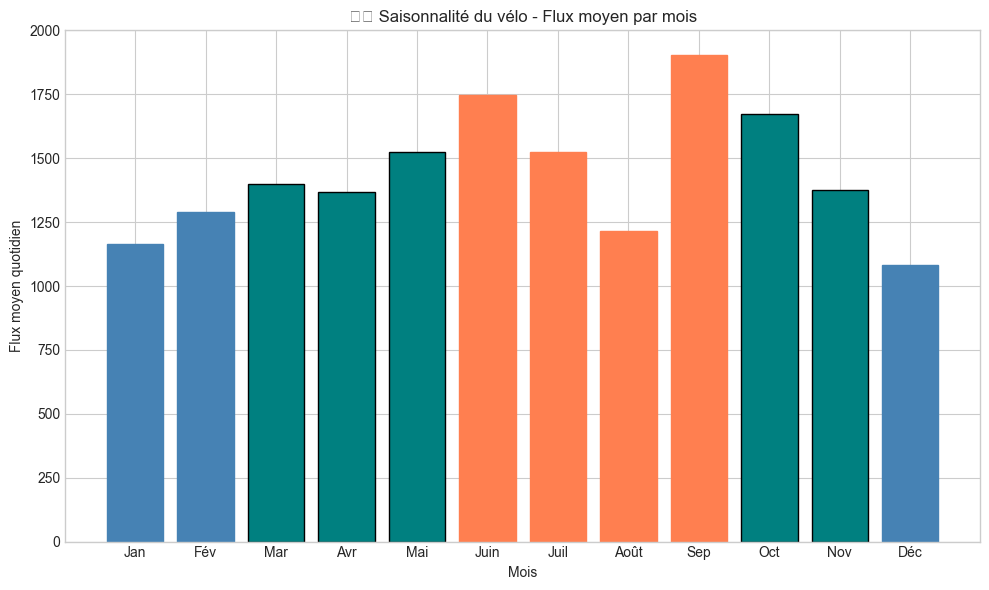

Ratio été/hiver: 1.27x


In [10]:
# Pattern mensuel (saisonnalité)
monthly = df_flow.groupby('month')['flux_estime'].mean().reset_index()
month_names = ['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Juin', 'Juil', 'Août', 'Sep', 'Oct', 'Nov', 'Déc']

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(monthly['month'], monthly['flux_estime'], color='teal', edgecolor='black')
ax.set_xlabel('Mois')
ax.set_ylabel('Flux moyen quotidien')
ax.set_title('🌡️ Saisonnalité du vélo - Flux moyen par mois')
ax.set_xticks(range(1, 13))
ax.set_xticklabels(month_names)

# Highlight été vs hiver
for i, bar in enumerate(bars):
    if i+1 in [6, 7, 8, 9]:  # Été
        bar.set_color('coral')
    elif i+1 in [12, 1, 2]:  # Hiver
        bar.set_color('steelblue')

plt.tight_layout()
plt.show()

print(f"Ratio été/hiver: {monthly[monthly['month'].isin([6,7,8])]['flux_estime'].mean() / monthly[monthly['month'].isin([12,1,2])]['flux_estime'].mean():.2f}x")

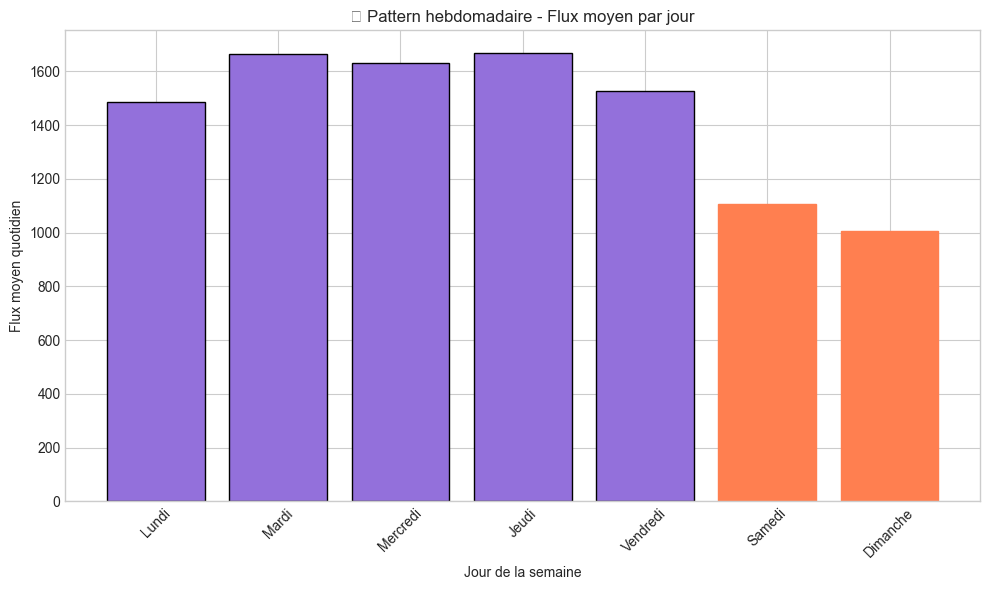

Ratio semaine/weekend: 1.51x


In [11]:
# Pattern hebdomadaire
daily = df_flow.groupby('day_of_week')['flux_estime'].mean().reset_index()
day_names = ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche']

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(daily['day_of_week'], daily['flux_estime'], color='mediumpurple', edgecolor='black')
ax.set_xlabel('Jour de la semaine')
ax.set_ylabel('Flux moyen quotidien')
ax.set_title('📆 Pattern hebdomadaire - Flux moyen par jour')
ax.set_xticks(range(7))
ax.set_xticklabels(day_names, rotation=45)

# Highlight weekend
for i, bar in enumerate(bars):
    if i >= 5:  # Samedi, Dimanche
        bar.set_color('coral')

plt.tight_layout()
plt.show()

print(f"Ratio semaine/weekend: {daily[daily['day_of_week'] < 5]['flux_estime'].mean() / daily[daily['day_of_week'] >= 5]['flux_estime'].mean():.2f}x")

## 5. Heatmap temporelle

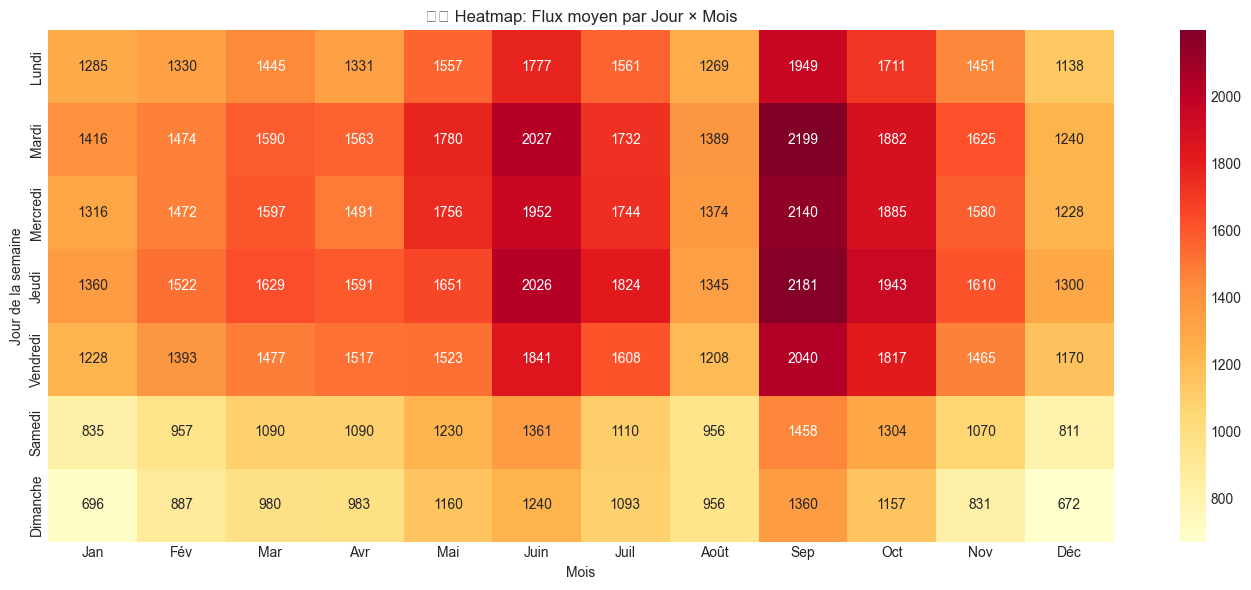

In [12]:
# Heatmap Mois × Jour de la semaine
pivot_data = df_flow.pivot_table(
    values='flux_estime',
    index='day_of_week',
    columns='month',
    aggfunc='mean'
)

fig, ax = plt.subplots(figsize=(14, 6))
sns.heatmap(pivot_data, annot=True, fmt='.0f', cmap='YlOrRd', ax=ax,
            xticklabels=month_names, yticklabels=day_names)
ax.set_xlabel('Mois')
ax.set_ylabel('Jour de la semaine')
ax.set_title('🗓️ Heatmap: Flux moyen par Jour × Mois')
plt.tight_layout()
plt.show()

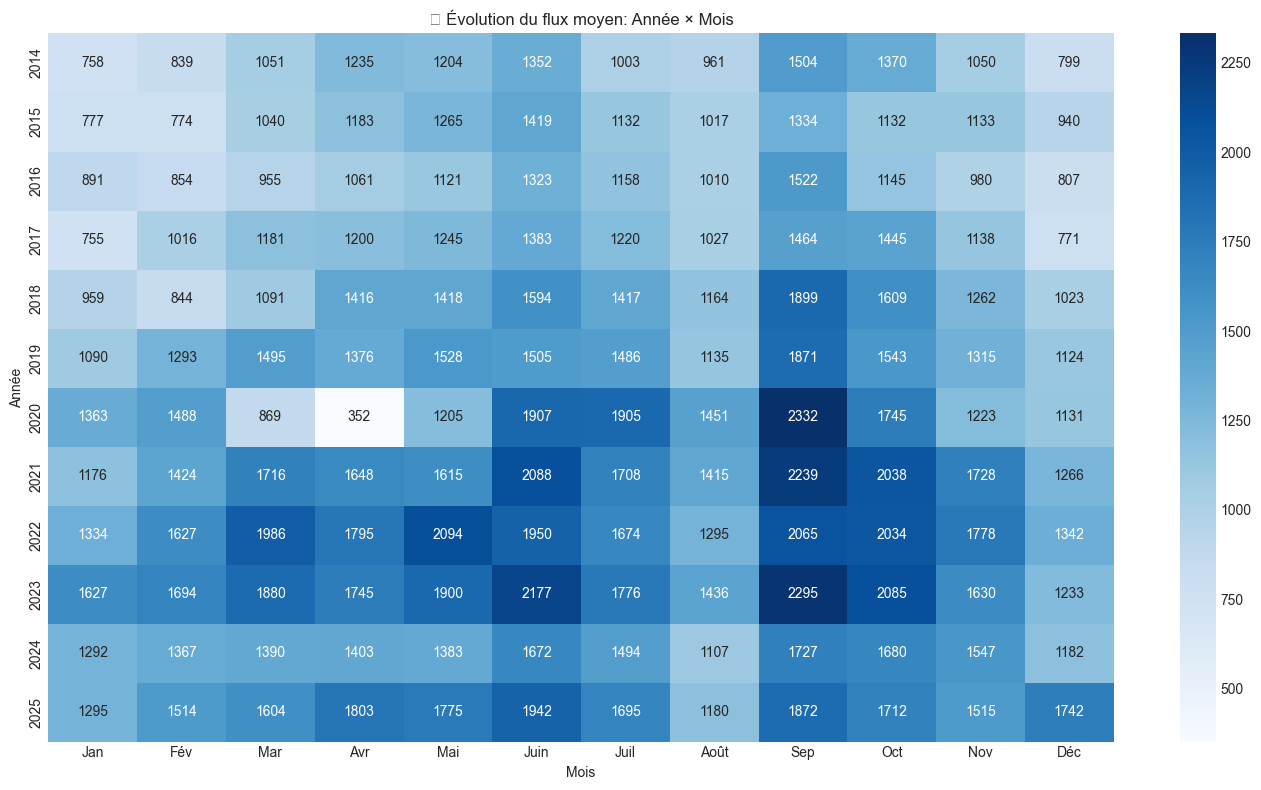

In [13]:
# Heatmap Année × Mois pour voir l'évolution
pivot_year_month = df_flow.pivot_table(
    values='flux_estime',
    index='year',
    columns='month',
    aggfunc='mean'
)

fig, ax = plt.subplots(figsize=(14, 8))
sns.heatmap(pivot_year_month, annot=True, fmt='.0f', cmap='Blues', ax=ax,
            xticklabels=month_names)
ax.set_xlabel('Mois')
ax.set_ylabel('Année')
ax.set_title('📈 Évolution du flux moyen: Année × Mois')
plt.tight_layout()
plt.show()

## 6. Analyse de la distribution des flux

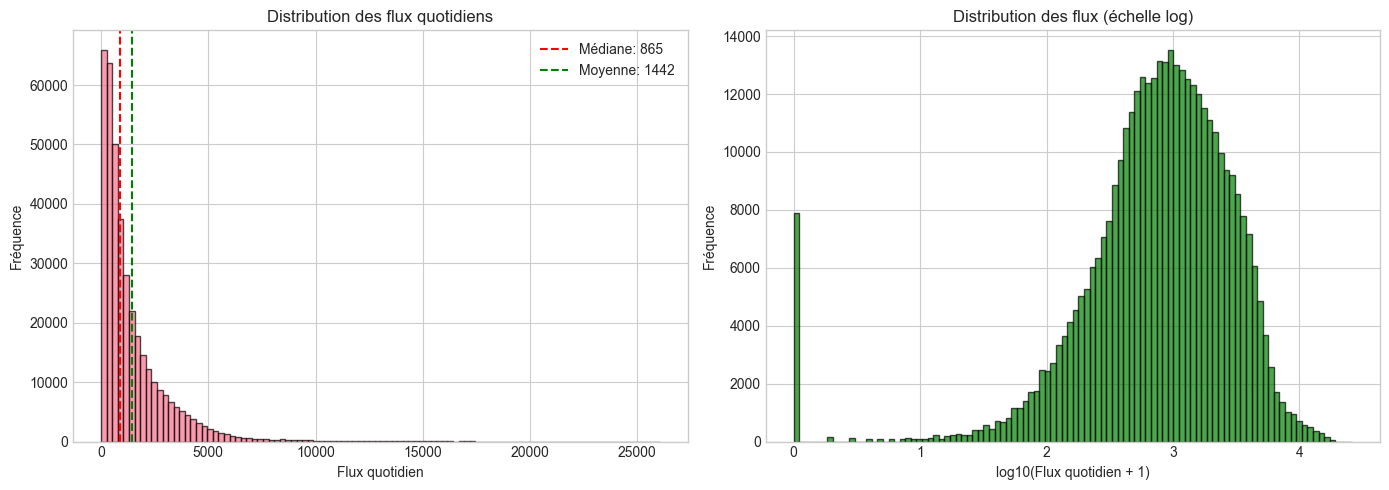


=== Percentiles du flux quotidien ===
  P5: 75 vélos/jour
  P10: 153 vélos/jour
  P25: 384 vélos/jour
  P50: 865 vélos/jour
  P75: 1,890 vélos/jour
  P90: 3,460 vélos/jour
  P95: 4,583 vélos/jour
  P99: 8,273 vélos/jour


In [14]:
# Distribution des flux (log scale pour mieux voir)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Distribution normale
axes[0].hist(df_flow['flux_estime'], bins=100, edgecolor='black', alpha=0.7)
axes[0].axvline(df_flow['flux_estime'].median(), color='red', linestyle='--', label=f"Médiane: {df_flow['flux_estime'].median():.0f}")
axes[0].axvline(df_flow['flux_estime'].mean(), color='green', linestyle='--', label=f"Moyenne: {df_flow['flux_estime'].mean():.0f}")
axes[0].set_xlabel('Flux quotidien')
axes[0].set_ylabel('Fréquence')
axes[0].set_title('Distribution des flux quotidiens')
axes[0].legend()

# Distribution log
axes[1].hist(np.log10(df_flow['flux_estime'] + 1), bins=100, edgecolor='black', alpha=0.7, color='green')
axes[1].set_xlabel('log10(Flux quotidien + 1)')
axes[1].set_ylabel('Fréquence')
axes[1].set_title('Distribution des flux (échelle log)')

plt.tight_layout()
plt.show()

# Percentiles
print("\n=== Percentiles du flux quotidien ===")
for p in [5, 10, 25, 50, 75, 90, 95, 99]:
    print(f"  P{p}: {df_flow['flux_estime'].quantile(p/100):,.0f} vélos/jour")

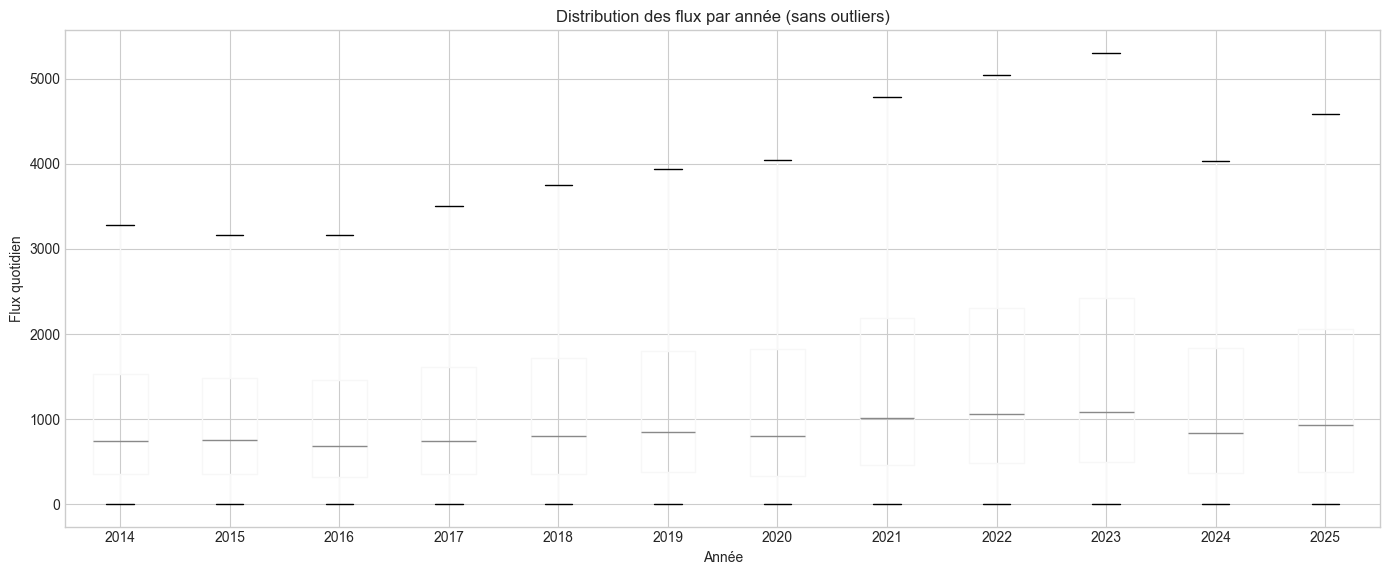

In [15]:
# Boxplot par année
fig, ax = plt.subplots(figsize=(14, 6))
df_flow.boxplot(column='flux_estime', by='year', ax=ax, showfliers=False)
ax.set_xlabel('Année')
ax.set_ylabel('Flux quotidien')
ax.set_title('Distribution des flux par année (sans outliers)')
plt.suptitle('')  # Remove automatic title
plt.tight_layout()
plt.show()

## 7. Analyse des liens Aménagement-Channel

In [16]:
# Statistiques des liens
link_stats = df_link.groupby('amenagement_id').agg(
    n_channels=('channel_id', 'nunique'),
    n_sites=('site_id', 'nunique'),
    avg_distance=('distance_m', 'mean'),
    min_distance=('distance_m', 'min'),
    max_distance=('distance_m', 'max')
).reset_index()

print(f"✓ {len(link_stats)} aménagements avec des compteurs liés")
print(f"\n=== Distribution des channels par aménagement ===")
print(link_stats['n_channels'].describe())

link_stats.sort_values('n_channels', ascending=False).head(15)

✓ 551 aménagements avec des compteurs liés

=== Distribution des channels par aménagement ===
count    551.000000
mean       8.466425
std        6.459542
min        1.000000
25%        4.000000
50%        7.000000
75%       10.000000
max       32.000000
Name: n_channels, dtype: float64


,amenagement_id,n_channels,n_sites,avg_distance,min_distance,max_distance
66,2107,32,4,134.280079,56.282923,166.187585
51,2042,32,4,63.549356,53.208113,87.183242
54,2046,32,4,90.333842,68.703648,108.921155
60,2073,32,4,159.074613,54.550901,196.834791
390,6030,32,4,137.288823,114.351220,151.386281
50,2041,32,4,113.127890,7.973427,150.367310
49,2040,32,4,53.133170,11.881536,149.071874
395,6039,32,4,59.696598,46.567269,94.593277
53,2045,32,4,49.557967,14.840164,125.925982
394,6038,32,4,99.917528,13.997915,129.707013


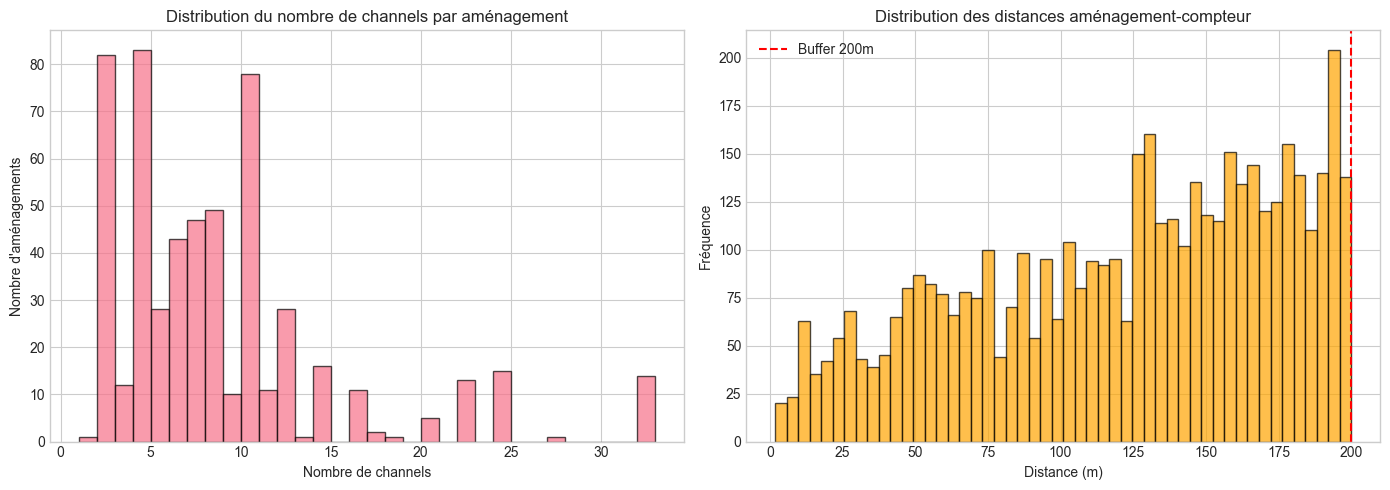

In [17]:
# Distribution du nombre de channels par aménagement
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogramme
axes[0].hist(link_stats['n_channels'], bins=range(1, link_stats['n_channels'].max()+2), edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Nombre de channels')
axes[0].set_ylabel('Nombre d\'aménagements')
axes[0].set_title('Distribution du nombre de channels par aménagement')

# Distribution des distances
axes[1].hist(df_link['distance_m'], bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[1].axvline(200, color='red', linestyle='--', label='Buffer 200m')
axes[1].set_xlabel('Distance (m)')
axes[1].set_ylabel('Fréquence')
axes[1].set_title('Distribution des distances aménagement-compteur')
axes[1].legend()

plt.tight_layout()
plt.show()

## 8. Série temporelle pour les top aménagements

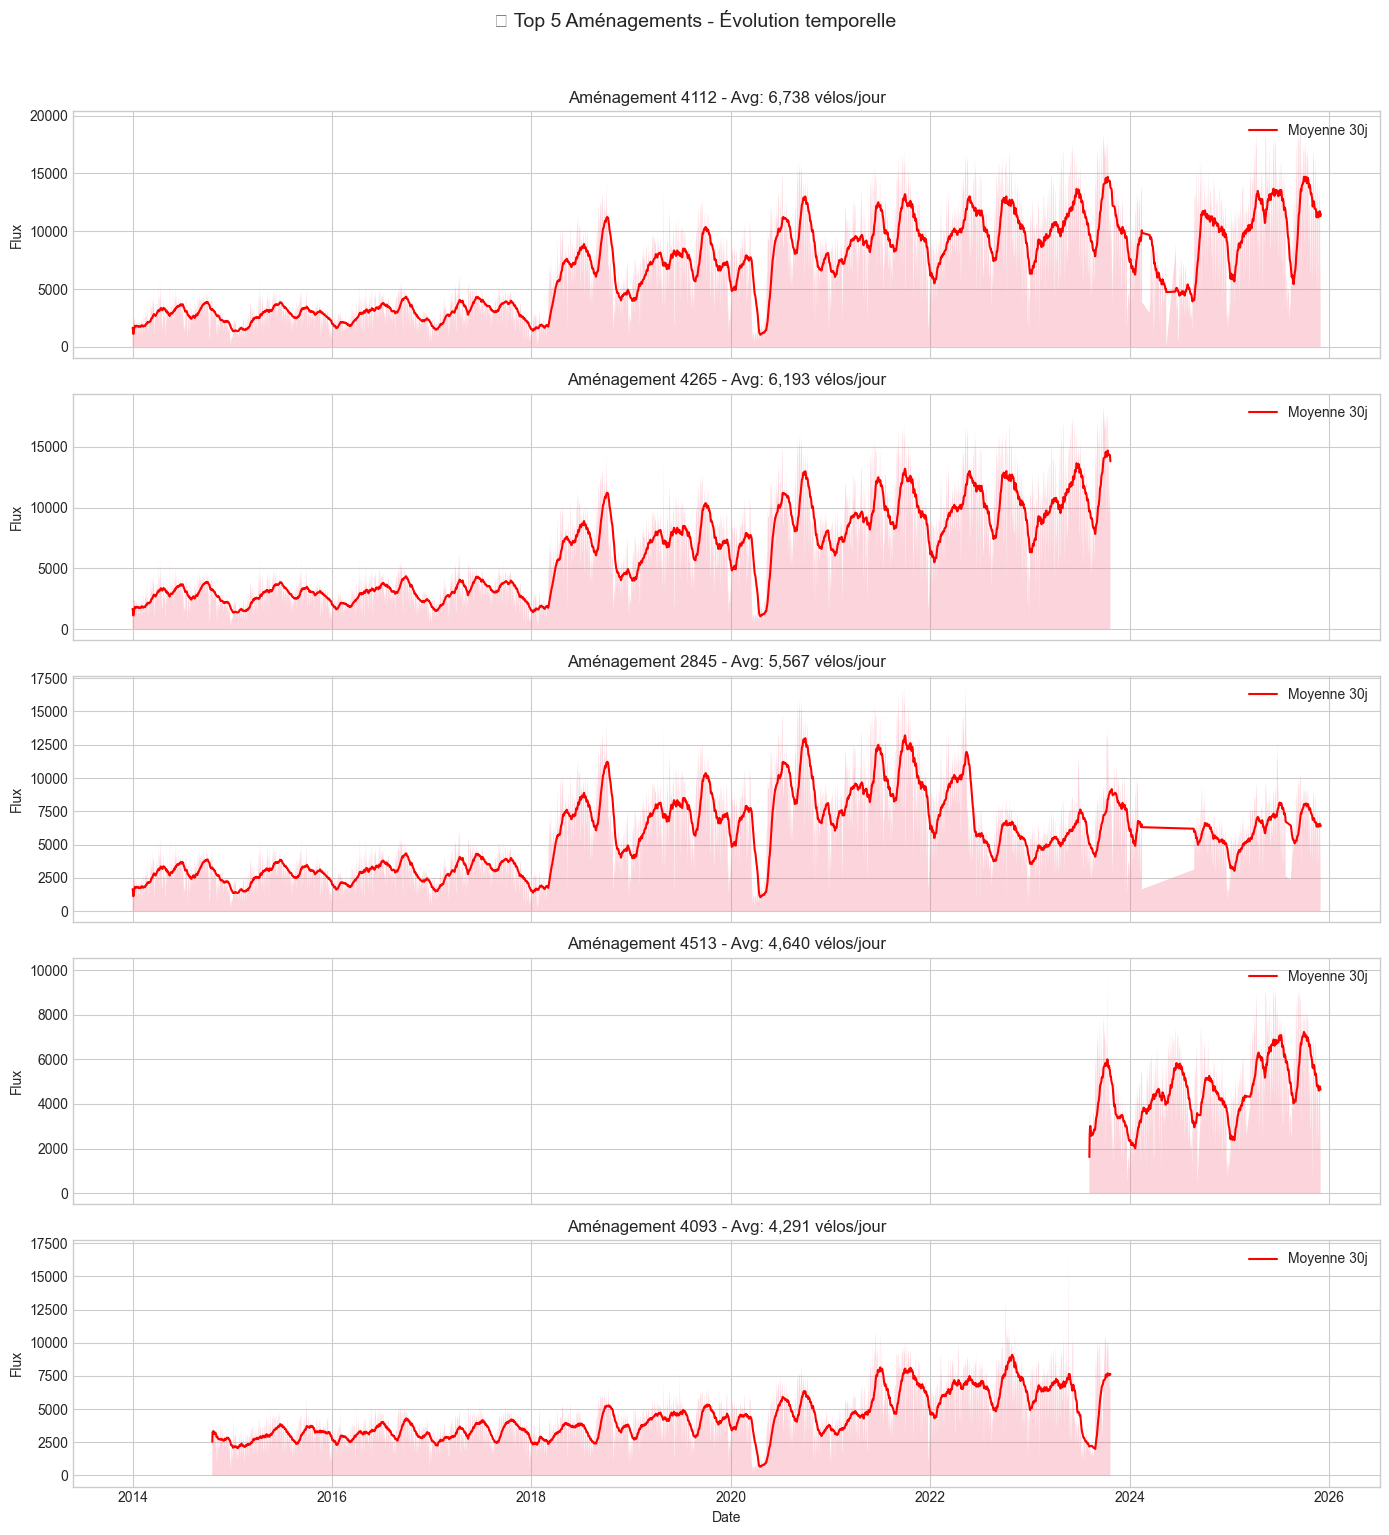

In [18]:
# Top 5 aménagements - série temporelle
top5_ids = summary.nlargest(5, 'avg_daily_flux')['amenagement_id'].tolist()

fig, axes = plt.subplots(5, 1, figsize=(14, 15), sharex=True)

for idx, amen_id in enumerate(top5_ids):
    data = df_flow[df_flow['amenagement_id'] == amen_id].sort_values('date')
    
    # Moyenne mobile 30 jours
    data['rolling_mean'] = data['flux_estime'].rolling(window=30, min_periods=1).mean()
    
    axes[idx].fill_between(data['date'], data['flux_estime'], alpha=0.3)
    axes[idx].plot(data['date'], data['rolling_mean'], color='red', linewidth=1.5, label='Moyenne 30j')
    axes[idx].set_ylabel('Flux')
    axes[idx].set_title(f'Aménagement {amen_id} - Avg: {summary[summary["amenagement_id"]==amen_id]["avg_daily_flux"].values[0]:,.0f} vélos/jour')
    axes[idx].legend(loc='upper right')

axes[-1].set_xlabel('Date')
plt.suptitle('📈 Top 5 Aménagements - Évolution temporelle', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

## 9. Détection d'anomalies

In [19]:
# Identifier les valeurs extrêmes
q99 = df_flow['flux_estime'].quantile(0.99)
q01 = df_flow['flux_estime'].quantile(0.01)

anomalies_high = df_flow[df_flow['flux_estime'] > q99]
anomalies_low = df_flow[(df_flow['flux_estime'] < q01) & (df_flow['flux_estime'] > 0)]
zeros = df_flow[df_flow['flux_estime'] == 0]

print(f"=== Détection d'anomalies ===")
print(f"Seuil haut (P99): {q99:,.0f} vélos/jour")
print(f"Seuil bas (P1): {q01:,.0f} vélos/jour")
print(f"\n⚠️ Valeurs > P99: {len(anomalies_high):,} observations ({len(anomalies_high)/len(df_flow)*100:.2f}%)")
print(f"⚠️ Valeurs < P1 (non nulles): {len(anomalies_low):,} observations")
print(f"⚠️ Valeurs = 0: {len(zeros):,} observations ({len(zeros)/len(df_flow)*100:.2f}%)")

# Top flux extrêmes
print("\n=== Top 10 flux les plus élevés ===")
df_flow.nlargest(10, 'flux_estime')[['amenagement_id', 'date', 'flux_estime']]

=== Détection d'anomalies ===
Seuil haut (P99): 8,273 vélos/jour
Seuil bas (P1): 0 vélos/jour

⚠️ Valeurs > P99: 3,855 observations (1.00%)
⚠️ Valeurs < P1 (non nulles): 0 observations
⚠️ Valeurs = 0: 7,905 observations (2.05%)

=== Top 10 flux les plus élevés ===


,amenagement_id,date,flux_estime
277480,5219,2022-10-10,26045
277481,5219,2022-10-11,23535
244303,4112,2025-09-18,19387
25032,1676,2022-12-21,18984
371686,7467,2022-12-21,18984
244301,4112,2025-09-16,18912
244177,4112,2025-05-15,18768
244142,4112,2025-04-10,18619
244302,4112,2025-09-17,18498
243656,4112,2023-09-28,18472


In [20]:
# ==================================================================================
# ANALYSE DES FLUX SUSPECTS (> 20 000 vélos/jour)
# ==================================================================================
# Seuil réaliste pour Lyon : ~15 000 vélos/jour max sur les axes les plus fréquentés
# Au-delà de 20 000 : à investiguer

SEUIL_SUSPECT = 20000

flux_suspects = df_flow[df_flow['flux_estime'] > SEUIL_SUSPECT].copy()
print(f"⚠️ {len(flux_suspects)} observations avec flux > {SEUIL_SUSPECT:,} vélos/jour")

if len(flux_suspects) > 0:
    # Analyser par aménagement
    print(f"\n=== Aménagements avec flux suspects ===")
    suspects_by_amen = flux_suspects.groupby('amenagement_id').agg(
        n_jours_suspects=('date', 'count'),
        max_flux=('flux_estime', 'max'),
        avg_flux_suspect=('flux_estime', 'mean'),
        dates_exemple=('date', lambda x: list(x.head(3)))
    ).sort_values('max_flux', ascending=False)
    
    display(suspects_by_amen)
    
    # Vérifier si ces aménagements ont plusieurs channels
    print(f"\n=== Vérification des channels pour ces aménagements ===")
    amen_suspects = flux_suspects['amenagement_id'].unique()
    channels_suspects = df_link[df_link['amenagement_id'].isin(amen_suspects)].groupby('amenagement_id').agg(
        n_channels=('channel_id', 'nunique'),
        n_sites=('site_id', 'nunique'),
        channels_list=('channel_id', list)
    )
    display(channels_suspects)
    
    # Distribution des jours suspects par jour de semaine
    flux_suspects['day_name'] = pd.to_datetime(flux_suspects['date']).dt.day_name()
    print(f"\n=== Répartition par jour de semaine ===")
    print(flux_suspects['day_name'].value_counts())
    
    # Top 10 jours les plus élevés
    print(f"\n=== Top 10 flux les plus élevés (à investiguer) ===")
    display(df_flow.nlargest(10, 'flux_estime')[['amenagement_id', 'date', 'flux_estime', 'n_channels']])
else:
    print("✅ Aucun flux suspect détecté - données cohérentes avec les standards Lyon")

⚠️ 2 observations avec flux > 20,000 vélos/jour

=== Aménagements avec flux suspects ===


,n_jours_suspects,max_flux,avg_flux_suspect,dates_exemple
amenagement_id,,,,
5219,2,26045,24790.0,"[2022-10-10 00:00:00, 2022-10-11 00:00:00]"



=== Vérification des channels pour ces aménagements ===


,n_channels,n_sites,channels_list
amenagement_id,,,
5219,12,3,"[101052943, 353651622, 353378658, 353303972, 1..."



=== Répartition par jour de semaine ===
day_name
Monday     1
Tuesday    1
Name: count, dtype: int64

=== Top 10 flux les plus élevés (à investiguer) ===


,amenagement_id,date,flux_estime,n_channels
277480,5219,2022-10-10,26045,1
277481,5219,2022-10-11,23535,1
244303,4112,2025-09-18,19387,1
25032,1676,2022-12-21,18984,1
371686,7467,2022-12-21,18984,1
244301,4112,2025-09-16,18912,1
244177,4112,2025-05-15,18768,1
244142,4112,2025-04-10,18619,1
244302,4112,2025-09-17,18498,1
243656,4112,2023-09-28,18472,1


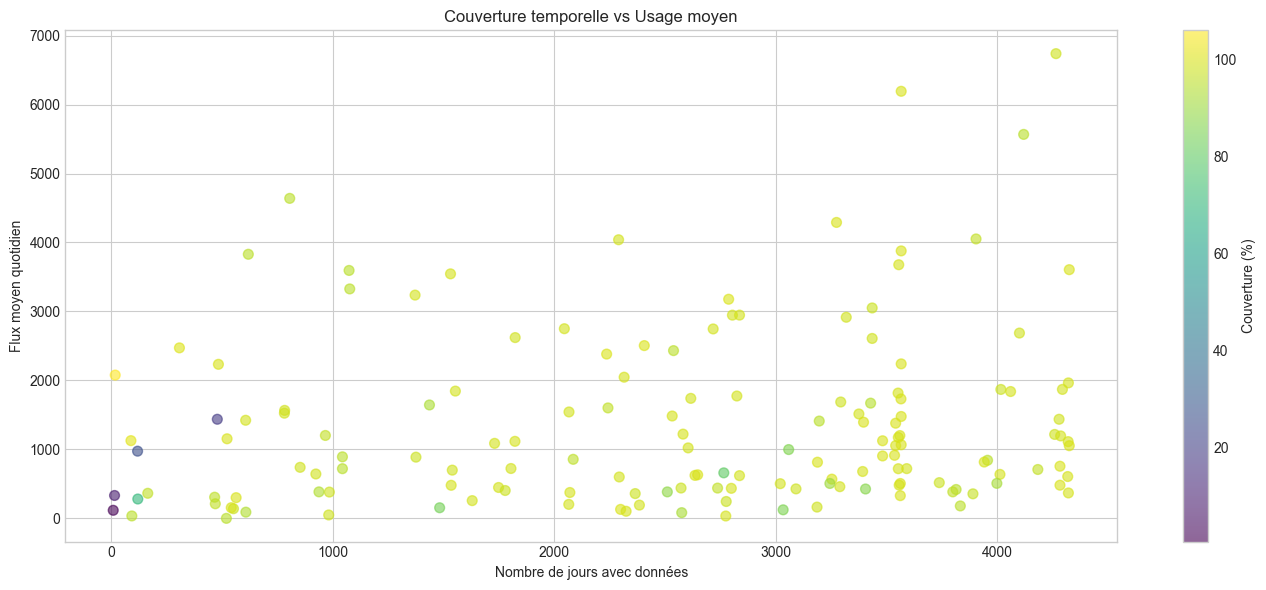

In [21]:
# Couverture temporelle par aménagement
fig, ax = plt.subplots(figsize=(14, 6))

# Scatter plot: couverture vs flux moyen
scatter = ax.scatter(
    summary['total_days'], 
    summary['avg_daily_flux'],
    c=summary['coverage_pct'].fillna(0),
    cmap='viridis',
    alpha=0.6,
    s=50
)
ax.set_xlabel('Nombre de jours avec données')
ax.set_ylabel('Flux moyen quotidien')
ax.set_title('Couverture temporelle vs Usage moyen')
plt.colorbar(scatter, label='Couverture (%)')

plt.tight_layout()
plt.show()

## 10. Résumé et préparation pour le scoring

In [22]:
# Résumé final
print("="*60)
print("📊 RÉSUMÉ DES DONNÉES GOLD - PRÊTES POUR SCORING")
print("="*60)

print(f"\n📁 Fichiers Gold:")
print(f"   • gold_flow_amenagement_daily: {len(df_flow):,} flux quotidiens")
print(f"   • gold_link_amenagement_channel: {len(df_link):,} liens")

print(f"\n🏗️ Aménagements:")
print(f"   • Total avec données: {len(summary)} aménagements")
print(f"   • Couverture moyenne: {summary['total_days'].mean():.0f} jours par aménagement")

print(f"\n📅 Période:")
print(f"   • De: {df_flow['date'].min().strftime('%Y-%m-%d')}")
print(f"   • À: {df_flow['date'].max().strftime('%Y-%m-%d')}")
print(f"   • Durée: {(df_flow['date'].max() - df_flow['date'].min()).days} jours")

print(f"\n🚴 Flux:")
print(f"   • Moyenne quotidienne: {df_flow['flux_estime'].mean():,.0f} vélos/jour")
print(f"   • Médiane: {df_flow['flux_estime'].median():,.0f} vélos/jour")
print(f"   • Max: {df_flow['flux_estime'].max():,.0f} vélos/jour")
print(f"   • Flux total cumulé: {df_flow['flux_estime'].sum():,.0f} passages")

print(f"\n⚠️ Qualité:")
print(f"   • Valeurs nulles: {df_flow['flux_estime'].isnull().sum()}")
print(f"   • Valeurs = 0: {len(zeros)} ({len(zeros)/len(df_flow)*100:.2f}%)")
print(f"   • Outliers (> P99): {len(anomalies_high)} ({len(anomalies_high)/len(df_flow)*100:.2f}%)")

print(f"\n✅ DONNÉES PRÊTES POUR MODULE 3 (SCORING)")
print("="*60)

📊 RÉSUMÉ DES DONNÉES GOLD - PRÊTES POUR SCORING

📁 Fichiers Gold:
   • gold_flow_amenagement_daily: 385,427 flux quotidiens
   • gold_link_amenagement_channel: 4,665 liens

🏗️ Aménagements:
   • Total avec données: 153 aménagements
   • Couverture moyenne: 2519 jours par aménagement

📅 Période:
   • De: 2014-01-01
   • À: 2025-12-01
   • Durée: 4352 jours

🚴 Flux:
   • Moyenne quotidienne: 1,442 vélos/jour
   • Médiane: 865 vélos/jour
   • Max: 26,045 vélos/jour
   • Flux total cumulé: 555,697,649 passages

⚠️ Qualité:
   • Valeurs nulles: 0
   • Valeurs = 0: 7905 (2.05%)
   • Outliers (> P99): 3855 (1.00%)

✅ DONNÉES PRÊTES POUR MODULE 3 (SCORING)


In [23]:
# Export du résumé pour Module 3
summary_export = summary.merge(
    link_stats[['amenagement_id', 'n_channels', 'n_sites', 'avg_distance']],
    on='amenagement_id',
    how='left'
)

summary_export.to_csv(f"{gold_path}/gold_summary_amenagements.csv", index=False)
print(f"✓ Résumé exporté: {gold_path}/gold_summary_amenagements.csv")
print(f"  → {len(summary_export)} aménagements avec statistiques complètes")

summary_export.head(10)

✓ Résumé exporté: ../../../../data/gold/gold_summary_amenagements.csv
  → 153 aménagements avec statistiques complètes


,amenagement_id,total_days,total_flux,avg_daily_flux,min_flux,max_flux,std_flux,first_date,last_date,date_range_days,coverage_pct,n_channels,n_sites,avg_distance
0,129,3563,1801606,505.642997,0,1928,353.423452,2014-01-01,2023-10-23,3582,99.5,6,2,138.609631
1,130,1824,4781186,2621.264254,0,6431,1666.649072,2020-01-02,2025-01-28,1853,98.4,5,2,175.538935
2,1509,4101,11019046,2686.916850,0,7166,1443.988925,2014-06-25,2025-12-01,4177,98.2,4,1,173.896199
3,1588,2582,3153365,1221.287761,0,3377,721.793348,2018-10-11,2025-12-01,2608,99.0,4,2,134.255656
4,1599,2738,1201554,438.843682,0,1464,272.894708,2018-02-05,2025-12-01,2856,95.9,10,2,20.039965
5,1607,3483,3918324,1124.985357,89,3472,477.537344,2014-01-01,2023-07-26,3493,99.7,10,4,192.452104
6,1609,3483,3151120,904.714327,13,2616,347.098500,2014-01-01,2023-07-26,3493,99.7,10,4,86.047123
7,1675,1483,227916,153.685772,0,448,98.064727,2021-01-21,2025-12-01,1775,83.5,4,1,43.167901
8,1676,2825,5011689,1774.049204,0,18984,1076.525095,2018-02-01,2025-12-01,2860,98.8,2,1,104.633744
9,1718,3566,6176126,1731.947841,0,4672,885.588792,2014-01-01,2023-10-23,3582,99.6,13,3,87.911610
